In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime




In [6]:
df_customers = pd.read_csv("https://dojo-git.s3.eu-west-3.amazonaws.com/cleaned/customers.csv", sep=";")
df_products = pd.read_csv("https://dojo-git.s3.eu-west-3.amazonaws.com/cleaned/products.csv", sep=";")
df_transactions = pd.read_csv("https://dojo-git.s3.eu-west-3.amazonaws.com/cleaned/Transactions.csv", sep=";")

In [5]:
df_customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [7]:
df_products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [8]:
df_transactions.head()

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033


### Merging tables

In [18]:
df_tp = pd.merge(df_transactions, df_products, how='left', left_on='id_prod', right_on='id_prod')
df = pd.merge(df_tp, df_customers, how='left', left_on='client_id', right_on='client_id')

In [19]:

df.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,11.99,0,f,1967
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,19.37,0,m,1960
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,4.50,0,m,1988
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,6.55,0,f,1989
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,16.49,0,f,1956


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687534 entries, 0 to 687533
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     687534 non-null  object 
 1   date        687534 non-null  object 
 2   session_id  687534 non-null  object 
 3   client_id   687534 non-null  object 
 4   price       687534 non-null  float64
 5   categ       687534 non-null  int64  
 6   sex         687534 non-null  object 
 7   birth       687534 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 47.2+ MB


In [21]:
df.describe()

,price,categ,birth
count,687534.000000,687534.000000,687534.000000
mean,17.493918,0.448789,1977.817391
std,18.238337,0.594563,13.607935
min,0.620000,0.000000,1929.000000
25%,8.990000,0.000000,1970.000000
50%,13.990000,0.000000,1980.000000
75%,19.080000,1.000000,1987.000000
max,300.000000,2.000000,2004.000000


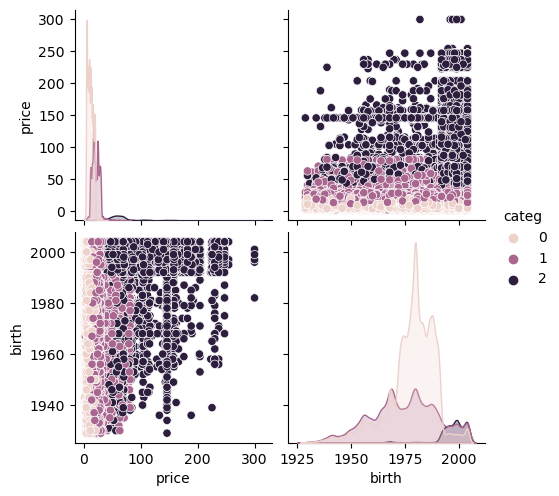

In [16]:
sns.pairplot(df, hue = "categ")
plt.show()

In [22]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date'] = df['date'].dt.floor('S')


In [24]:
today = datetime.now()

In [26]:
# Création d'une table rfm

rfm = df.groupby('client_id').agg(
    {
        'date' : lambda x: (today - x.max()).days, # Calcul du nombre de jours entre la date d'aujourd'hui et la date de la dernière commande par clients
        'client_id' : 'count',
        'price' : 'sum',
        }
    ).rename(columns={
            'date' : 'Recency',
            'client_id' : 'Frequency',
            'price' : 'Monetary',
        }
    ).reset_index()

In [27]:
rfm.head()

,client_id,Recency,Frequency,Monetary
0,c_1,499,43,629.02
1,c_10,488,58,1353.60
2,c_100,617,8,254.85
3,c_1000,490,126,2291.88
4,c_1001,460,103,1823.85
